In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Retângulo e trapézio
1. Erro do retângulo e do trapézio para calcular a integral de 0 a 2pi sin(x)dx em função de h ou n

In [2]:
def retangulo(f, a, b, n=1000):
  xs = np.linspace(a, b, n, endpoint=False)
  fxs = f(xs)
  return sum(fxs)*(b-a)/n

In [3]:
retangulo(np.sin, 0, 2*np.pi)

2.409899140342839e-16

In [4]:
def trapezio(f, a, b, n=1000):
  xs = np.linspace(a, b, n + 1, endpoint=True)
  fxs = f(xs)
  h = (b-a)/n

  return sum([(h*(fxs[i-1] + fxs[i]))/2 for i in range(1, len(xs))])

In [5]:
trapezio(np.sin, 0, 2*np.pi)

1.8442956580336234e-16

In [6]:
def generateGraph(f, a, b, intAna, en=6):
  ns = np.logspace(1, en, 12, dtype=int, base=10)

  rys = [abs(intAna - retangulo(f, a, b, int(n))) for n in ns]
  plt.plot(ns, rys, 'o-', label='Retangulo')

  tys = [abs(intAna - trapezio(f, a, b, int(n))) for n in ns]
  plt.plot(ns, tys, '*-', label='Trapezio')

  plt.xscale('log')
  plt.yscale('log')
  plt.title(f"Erro da integral da função {f.__name__} de {a} a {b} em função do número de pontos")
  plt.xlabel("Número de pontos")
  plt.ylabel("Erro")
  plt.grid()
  plt.legend()

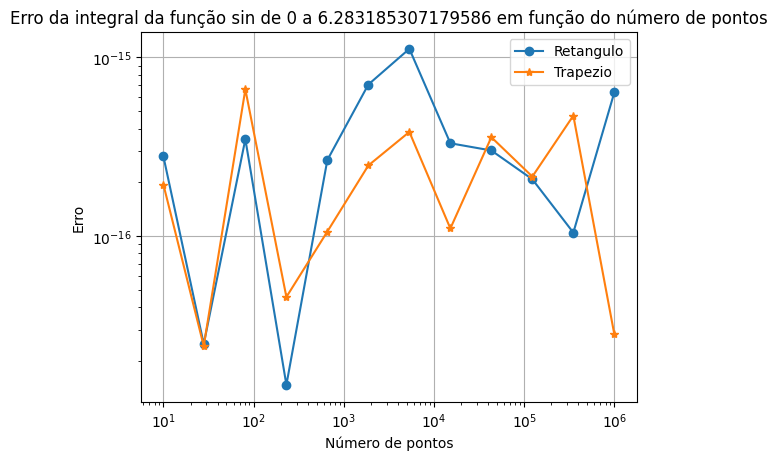

In [7]:
generateGraph(np.sin, 0, 2*np.pi, 0)

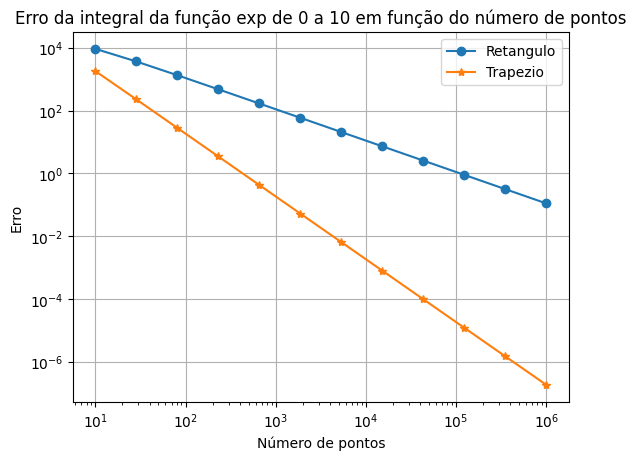

In [8]:
generateGraph(np.exp, 0, 10, np.exp(10) - 1)

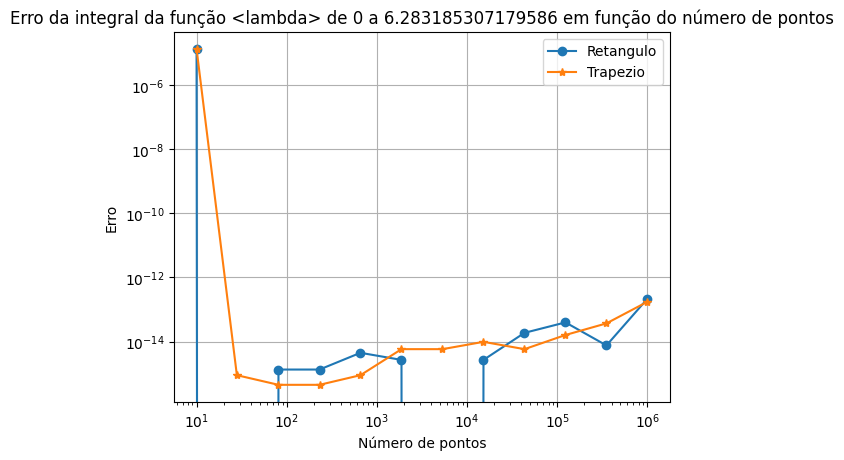

In [9]:
generateGraph(lambda x: 1/(2 + np.cos(x)), 0, 2*np.pi, 2*np.pi/np.sqrt(3))

In [10]:
%time retangulo(np.sin, 0, 2*np.pi, 1000000)
%time retangulo(np.sin, 0, 2*np.pi, 10000000)

CPU times: user 83.1 ms, sys: 824 µs, total: 84 ms
Wall time: 81.6 ms
CPU times: user 723 ms, sys: 44.9 ms, total: 768 ms
Wall time: 765 ms


1.952213199902856e-16

In [11]:
%time trapezio(np.sin, 0, 2*np.pi, 1000000)
%time trapezio(np.sin, 0, 2*np.pi, 10000000)

CPU times: user 450 ms, sys: 11.9 ms, total: 462 ms
Wall time: 475 ms
CPU times: user 4.21 s, sys: 383 ms, total: 4.6 s
Wall time: 4.6 s


3.011023265756665e-17

In [12]:
def generateGraphWithRelativeError(f, a, b, intAna, en=6):
  ns = np.logspace(1, en, 12, dtype=int, base=10)

  rys = [abs(intAna - retangulo(f, a, b, int(n))) for n in ns]

  tys = [abs(intAna - trapezio(f, a, b, int(n))) for n in ns]

  rysr = [ry/intAna for ry in rys]
  plt.plot(ns, rysr, '*-', label='Retangulo')

  tysr = [ty/intAna for ty in tys]
  plt.plot(ns, tysr, 'o-', label='Trapezio')

  plt.xscale('log')
  plt.yscale('log')
  plt.title(f"Erro Relativo da integral da função {f.__name__} de {a} a {b} em função do número de pontos")
  plt.xlabel("Número de pontos")
  plt.ylabel("Erro")
  plt.grid()
  plt.legend()

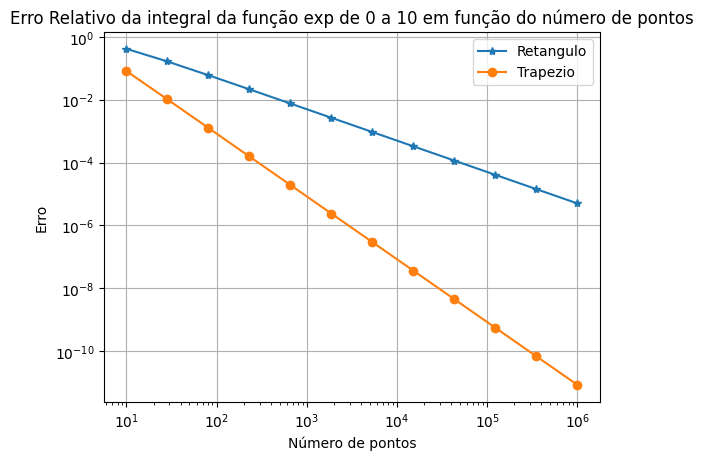

In [13]:
generateGraphWithRelativeError(np.exp, 0, 10, np.exp(10) - 1)

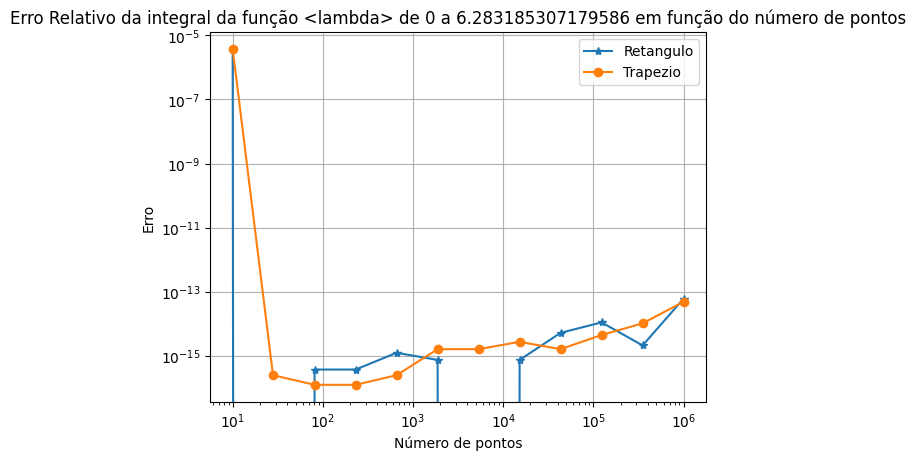

In [14]:
generateGraphWithRelativeError(lambda x: 1/(2 + np.cos(x)), 0, 2*np.pi, 2*np.pi/np.sqrt(3))